# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests

import pandas as pd

import alpaca_trade_api as tradeapi

from datetime import datetime
from datetime import timedelta
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38223.60
The current value of your 5.3 ETH is $10225.08


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



In [8]:


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
print(api)

In [9]:
# Format current date as ISO format
#start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
today = pd.Timestamp("today", tz="America/New_York").isoformat()
# Set the ticker info

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investments = api.get_barset(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame
df_investments.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-07-15 00:00:00-04:00  115.94  116.02  115.7222  115.99  3675913  434.81   

                                                             
                             high     low   close    volume  
time                                                         
2021-07-15 00:00:00-04:00  435.53  432.72  434.73  50376465

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"][0])
spy_close_price = float(df_investments["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.99
Current SPY closing price: $434.73


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21736.50
The current value of your 200 AGG shares is $23198.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,48448.678
shares,44934.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

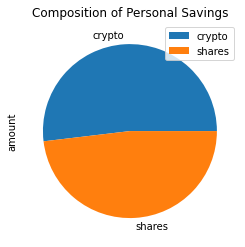

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
today = datetime.today()
start_date = today - timedelta(days=1825)
end_date = today


In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2021-02-23 00:00:00-05:00  115.75  115.7500  115.2700  115.52   5373535   
2021-02-24 00:00:00-05:00  115.06  115.5000  115.0100  115.47   6131453   
2021-02-25 00:00:00-05:00  115.01  115.2900  114.2000  114.41  14520445   
2021-02-26 00:00:00-05:00  114.96  115.3900  114.5915  115.37   9735524   
2021-03-01 00:00:00-05:00  114.97  115.5899  114.8900  115.13  12546198   

                              SPY                                        
                             open     high       low   close     volume  
time                                                                     
2021-02-23 00:00:00-05:00  384.66  388.945  380.2000  387.50   98333278  
2021-02-24 00:00:00-05:00  386.33  392.230  385.2700  391.76   64527459  
2021-02-25 00:00:00-05:00  390.41  391.880  380.7789  382.39  137059806  
2021-02-26 00:00:00-05:00  384.35  385.580  378.2300  380.32  134902084  
2021-03-01 00:00:00-05:00  385.59  390.920  380.5720  389.52   92437154

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)


In [22]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2021-02-23 00:00:00-05:00  115.75  115.7500  115.2700  115.52   5373535   
2021-02-24 00:00:00-05:00  115.06  115.5000  115.0100  115.47   6131453   
2021-02-25 00:00:00-05:00  115.01  115.2900  114.2000  114.41  14520445   
2021-02-26 00:00:00-05:00  114.96  115.3900  114.5915  115.37   9735524   
2021-03-01 00:00:00-05:00  114.97  115.5899  114.8900  115.13  12546198   

                                           SPY                             \
                          daily_return    open     high       low   close   
time                                                                        
2021-02-23 00:00:00-05:00          NaN  384.66  388.945  380.2000  387.50   
2021-02-24 00:00:00-05:00    -0.000433  386.33  392.230  385.2700  391.76   
2021-02-25 00:00:00-05:00    -0.009180  390.41  391.880  380.7789  382.39   
2021-02-26 00:00:00-05:00     0.008391  384.35  385.580  378.2300  380.32   
2021-03-01 00:00:00-05:00    -0.002080  385.59  390.920  380.5720  389.52   

                                                   
                              volume daily_return  
time                                               
2021-02-23 00:00:00-05:00   98333278          NaN  
2021-02-24 00:00:00-05:00   64527459     0.010994  
2021-02-25 00:00:00-05:00  137059806    -0.023918  
2021-02-26 00:00:00-05:00  134902084    -0.005413  
2021-03-01 00:00:00-05:00   92437154     0.024190

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

In [ ]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8] * initial_investment,2)
ci_upper_five = round(tbl_five[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8] * initial_investment,2)
ci_upper_ten = round(tbl_ten[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")